# Basic Data Augmentation

In [1]:
from data_aug.data_aug import *
from data_aug.bbox_util import *
import numpy as np
from typing import List
import cv2 
import matplotlib.pyplot as plt 
import pickle as pkl

In [2]:
def convert_bboxes(yolo_bboxes: List[List[float]], img_size: tuple) -> np.ndarray:
    bboxes = []
    width_img = img_size[1]
    height_img = img_size[0]

    for box in yolo_bboxes:
        id_label = box[0]
        x_center_normed = box[1]
        y_center_normed = box[2]
        width_normed = box[3]
        height_normed = box[4]

        x_left = (x_center_normed - width_normed / 2) * width_img
        x_left = round(x_left, 4)

        x_right = (x_center_normed + width_normed / 2) * width_img
        x_right = round(x_right, 4)

        y_left = (y_center_normed - height_normed / 2) * height_img
        y_left = round(y_left, 4)

        y_right = (y_center_normed + height_normed / 2) * height_img
        y_right = round(y_right, 4)

        bboxes.append([x_left, y_left, x_right, y_right, id_label])

    return np.array(bboxes)

def read_label(file_path: str) -> List[List[float]]:
    bboxes = []
    with open(file_path, 'r') as file:
        lines = file.readlines()

    for line in lines:
        line = line.strip()
        if line != '':
            num_list = list(map(float, line.split(' ')))
            bboxes.append(num_list)

    return bboxes

In [3]:
bboxes = read_label('data_samples/raccoon.txt')
img = cv2.imread('data_samples/raccoon.jpg')
img_size = (img.shape[0], img.shape[1])

In [4]:
bboxes = convert_bboxes(yolo_bboxes=bboxes, img_size=img_size)

In [5]:
bboxes

array([[ 81.,  88., 522., 408.,   0.]])

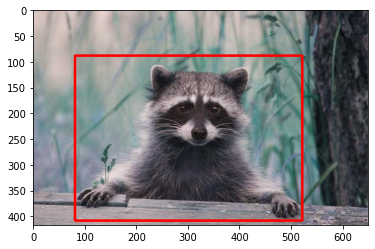

In [6]:
# Visualize bounding box
plotted_img = draw_rect(img, bboxes[:, :5], color=[255, 0, 0])
plt.imshow(plotted_img)
plt.show()

Now, we can get started with our image augmentations. The first one is **Horizontal Flipping**. The function takes one arguement, *p* which is the probability that the image will be flipped. 

## Horizontal Flipping

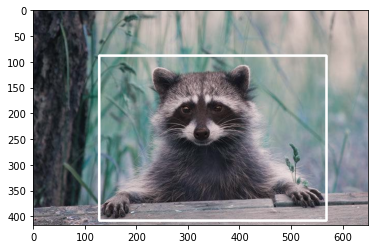

In [7]:
img_, bboxes_ = RandomHorizontalFlip(3)(img.copy(), bboxes.copy())
plotted_img = draw_rect(img_, bboxes_)
plt.imshow(plotted_img)
plt.show()

## Scaling

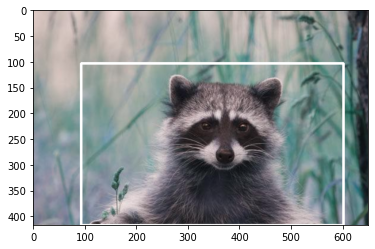

In [39]:
img_, bboxes_ = RandomScale(0.4, diff = True)(img.copy(), bboxes.copy())
plotted_img = draw_rect(img_, bboxes_)
plt.imshow(plotted_img)
plt.show()

## Translation

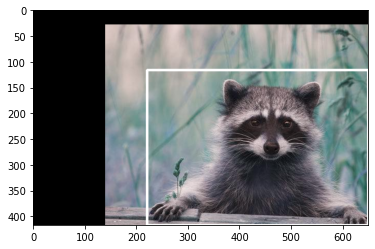

In [40]:
img_, bboxes_ = RandomTranslate(0.3, diff = True)(img.copy(), bboxes.copy())
plotted_img = draw_rect(img_, bboxes_)
plt.imshow(plotted_img)
plt.show()

## Rotation

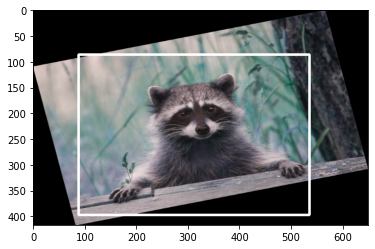

In [46]:
img_, bboxes_ = RandomRotate(15)(img.copy(), bboxes.copy())
plotted_img = draw_rect(img_, bboxes_)
plt.imshow(plotted_img)
plt.show()

## Shearing

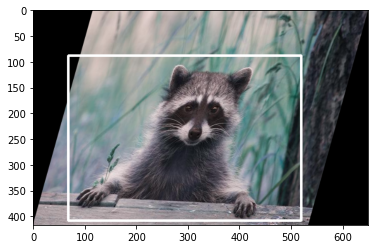

In [48]:
img_, bboxes_ = RandomShear(0.4)(img.copy(), bboxes.copy())
plotted_img = draw_rect(img_, bboxes_)
plt.imshow(plotted_img)
plt.show()

## Resize
Resize the image to different dimensions

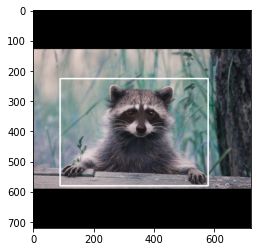

In [9]:
img_, bboxes_ = Resize((720))(img.copy(), bboxes.copy())
plotted_img = draw_rect(img_, bboxes_)
plt.imshow(plotted_img)
plt.show()

HSV transforms are supported as well. 

## HSV transform

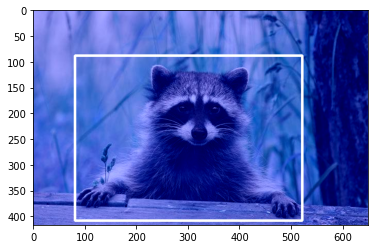

In [10]:
img_, bboxes_ = RandomHSV(100, 100, 100)(img.copy(), bboxes.copy())
plotted_img = draw_rect(img_, bboxes_)
plt.imshow(plotted_img)
plt.show()

You can combine multiple transforms together by using the Sequence class as follows. 

## Combine multiple transforms together

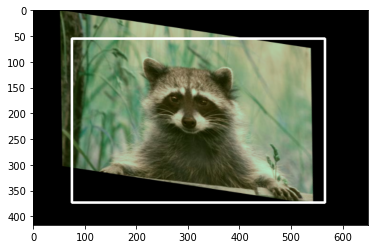

In [13]:
seq = Sequence([RandomHSV(40, 40, 30),RandomHorizontalFlip(), RandomScale(), RandomTranslate(), RandomRotate(15), RandomShear()])
img_, bboxes_ = seq(img.copy(), bboxes.copy())

plotted_img = draw_rect(img_, bboxes_)
plt.imshow(plotted_img)
plt.show()

# Image Augmentation for Object Detection

## Mosaic
Combines 4 images into one in certain ratios

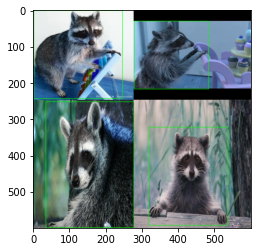

In [20]:
from data_aug.mosaic import MosaicAugmentation

data_dir = 'data_samples'
mosaic_augmentor = MosaicAugmentation(data_dir=data_dir)

img, boxed_img = mosaic_augmentor.sample()
plt.imshow(boxed_img)
plt.show()

## Mixup

The new augmented image is simply as blend of 2 input images

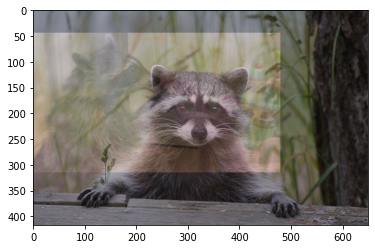

In [40]:
from data_aug.mixup import MixupAugmentation

data_dir = 'data_samples/'
mixup_augmentor = MixupAugmentation(anno_dir=data_dir)

img1 = 'data_samples/raccoon.jpg'
img2 = 'data_samples/raccoon-6_jpg.rf.1166741c763a5ea5695a235e0262444e.jpg'
augmented_img = mixup_augmentor.sample(img1, img2)
augmented_img = np.transpose(augmented_img, (1, 2, 0))
plt.imshow(augmented_img)
plt.show()

## CutOut

In [58]:
from data_aug.cutout import CutoutAugmentation
data_dir = 'data_samples/'
cutout_augmentor = CutoutAugmentation(anno_dir=data_dir)

img1 = 'data_samples/raccoon.jpg'
augmented_img = cutout_augmentor.sample(img1)
augmented_img = np.transpose(augmented_img, (1, 2, 0))
plt.imshow(augmented_img)
plt.show()

KeyboardInterrupt: 